In [35]:
import os, sys
import itertools

import numpy   as np
import pandas  as pd
import cPickle as pkl

from scipy import stats
from PIL   import Image, ImageFilter

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import generate_image_lists as giList
import generate_image_labels as giLabels
import edge_feature_generation as efg

%matplotlib inline

plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (7,5)

In [3]:
full_df = pd.read_csv('data/white_labels_edge_pca_50.csv')

with open('data/short_logistic_clf.pkl','r') as f:
    short_clf_dict = pkl.load(f)
with open('data/long_logistic_clf.pkl','r') as f:
    long_clf_dict = pkl.load(f)
with open('data/height_logistic_clf.pkl','r') as f:
    height_clf_dict = pkl.load(f)

In [4]:
features = ['row_col_ratio'] + [ col for col in full_df.columns.values if ('PCA' in col) ]

x_vals = full_df[features]

short_arr = [1,2,4,6,8]
long_arr  = [1,2,3,4,6,8,10,12]

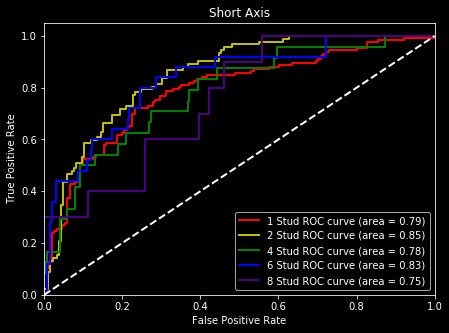

In [8]:
# Do short ROC

from sklearn.metrics import roc_curve, auc

#colorz = ['r','orange','y','g','springgreen','b','indigo','purple']
colorz = ['r','y','g','b','indigo','purple']

arr_to_use = short_arr
arr_str    = 'short_'
class_dict = short_clf_dict
tit_start  = 'Short'

fig, ax = plt.subplots()

for i in range( 0, len( arr_to_use ) ):

    num_str = str(arr_to_use[i])
    class_select = arr_str + num_str
    y_short = full_df[class_select].values

    preds = class_dict[class_select].predict_proba(x_vals)[:,1]

    fpr, tpr, q = roc_curve( y_short, preds )
    a_u_c       = auc( fpr, tpr )

    lw = 2
    ax.plot(fpr, tpr, color=colorz[i],
             lw=lw, label=num_str+' Stud ROC curve (area = %0.2f)' % a_u_c)
    
plt.plot([0, 1], [0, 1], color='w', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(tit_start+' Axis')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (7,5)
plt.show()

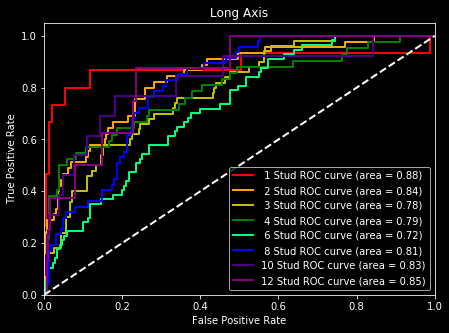

In [11]:
# Do short ROC

from sklearn.metrics import roc_curve, auc

colorz = ['r','orange','y','g','springgreen','b','indigo','purple']
#colorz = ['r','y','g','b','indigo','purple']

arr_to_use = long_arr
arr_str    = 'long_'
class_dict = long_clf_dict
tit_start  = 'Long'

fig, ax = plt.subplots()

for i in range( 0, len( arr_to_use ) ):

    num_str = str(arr_to_use[i])
    class_select = arr_str + num_str
    y_short = full_df[class_select].values

    preds = class_dict[class_select].predict_proba(x_vals)[:,1]

    fpr, tpr, q = roc_curve( y_short, preds )
    a_u_c       = auc( fpr, tpr )

    lw = 2
    ax.plot(fpr, tpr, color=colorz[i],
             lw=lw, label='%2s Stud ROC curve (area = %0.2f)' % (num_str,a_u_c))
    
plt.plot([0, 1], [0, 1], color='w', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(tit_start+' Axis')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (7,5)
plt.show()

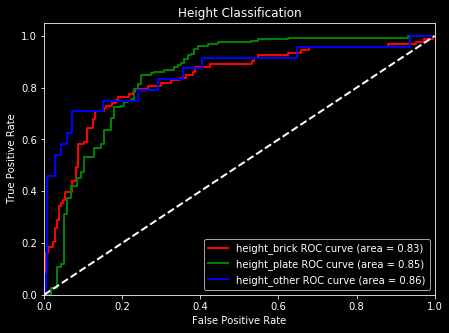

In [41]:
# Do short ROC

from sklearn.metrics import roc_curve, auc

colorz = ['r','g','b']

title  = 'Height Classification'
height_list = [ col for col in full_df.columns.values if ('height_' in col) ]

fig, ax = plt.subplots()

for i in range( 0, 3 ):

    class_str = height_list[i]
    y_short = full_df[class_str].values

    
    preds = height_clf_dict[class_str].predict_proba(x_vals)[:,1]

    fpr, tpr, q = roc_curve( y_short, preds )
    a_u_c       = auc( fpr, tpr )

    lw = 2
    ax.plot(fpr, tpr, color=colorz[i],
             lw=lw, label='%s ROC curve (area = %0.2f)' % (class_str,a_u_c))
    
plt.plot([0, 1], [0, 1], color='w', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(title)
plt.legend(loc="lower right")
plt.rcParams['figure.figsize'] = (7,5)
plt.show()

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def revert_onehot( inp_vals ):

    inp_vals = np.array( inp_vals )
    
    out_df = pd.DataFrame( {'vals':0}, index=range(0,inp_vals.shape[0]) )

    ind_arr   = np.zeros( inp_vals.shape[0] )
    inp_frame = pd.DataFrame( inp_vals )
    
    for i in range( 0, inp_vals.shape[1] ):
        inds = ( inp_frame[i] == 1 )
        out_df.loc[ inds ] = i
    return out_df.values

def convert_onehot( inp_vals ):

    inp_vals = np.array( inp_vals )
    
    for i in range( 0, inp_vals.shape[0] ):
        if ( inp_vals[i] == 1 ):
            break
    return i
    
def confusionMatrix( true_vals, pred_vals ):
    
    assert ( true_vals.shape[0] == pred_vals.shape[0] ), 'True and pred vals must have same first shape'
    assert ( true_vals.shape[1] == pred_vals.shape[1] ), 'True and pred vals must have same second shape'
    
    cm = np.zeros( [true_vals.shape[1],true_vals.shape[1]], dtype=np.int32 )
    
    true_values = revert_onehot( true_vals )
    
    for     i in range( 0, true_vals.shape[0] ):
        for j in range( 0, true_vals.shape[1] ):
            if ( pred_vals[i,j] == 1 ):
                cm[ true_values[i], j ] = cm[ true_values[i], j ] + 1
    return cm

Normalized confusion matrix
[[0.7  0.   0.   0.   0.2  0.1  0.  ]
 [0.   0.81 0.06 0.06 0.06 0.   0.  ]
 [0.07 0.13 0.53 0.07 0.13 0.07 0.  ]
 [0.   0.   0.   1.   0.   0.   0.  ]
 [0.12 0.06 0.   0.06 0.56 0.19 0.  ]
 [0.   0.08 0.   0.   0.08 0.85 0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.25]]


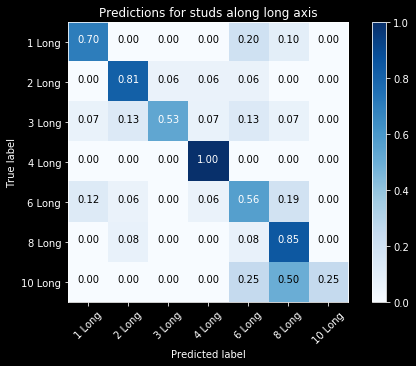

In [38]:
arr_to_use = long_arr[:-1]
arr_str    = 'long_'
class_dict = long_clf_dict
tit_start  = 'Long'
tit        = 'Predictions for studs along long axis'

true_list = []
pred_list = []

class_names = [ str(i)+' '+tit_start for i in arr_to_use ]

for i in range( 0, len( arr_to_use ) ):

    num_str = str(arr_to_use[i])
    class_select = arr_str + num_str
    y_true = full_df[class_select].values

    preds = class_dict[class_select].predict(x_vals)

    pred_list.append( preds )
    true_list.append( y_true )

pred_arr = np.swapaxes( np.array(pred_list), 0, 1 )
true_arr = np.swapaxes( np.array(true_list), 0, 1 )

cnf_matrix = confusionMatrix( true_arr, pred_arr )
np.set_printoptions(precision=2)

## Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title=tit)
plt.show()
# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')
#
#plt.show()

Normalized confusion matrix
[[0.79 0.17 0.01 0.04]
 [0.26 0.74 0.   0.  ]
 [0.54 0.15 0.23 0.08]
 [0.36 0.   0.   0.64]]


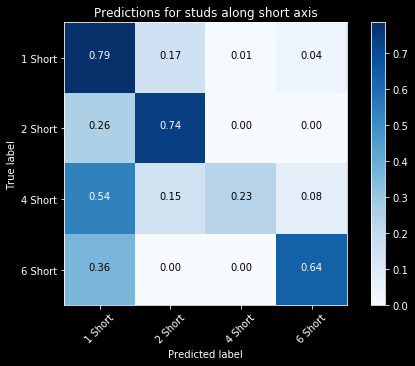

In [39]:
arr_to_use = short_arr[:-1]
arr_str    = 'short_'
class_dict = short_clf_dict
tit_start  = 'Short'
tit        = 'Predictions for studs along short axis'

true_list = []
pred_list = []

class_names = [ str(i)+' '+tit_start for i in arr_to_use ]

for i in range( 0, len( arr_to_use ) ):

    num_str = str(arr_to_use[i])
    class_select = arr_str + num_str
    y_true = full_df[class_select].values

    preds = class_dict[class_select].predict(x_vals)

    pred_list.append( preds )
    true_list.append( y_true )

pred_arr = np.swapaxes( np.array(pred_list), 0, 1 )
true_arr = np.swapaxes( np.array(true_list), 0, 1 )

cnf_matrix = confusionMatrix( true_arr, pred_arr )
np.set_printoptions(precision=2)

## Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title=tit)
plt.show()
# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')
#
#plt.show()

Normalized confusion matrix
[[0.67 0.33 0.  ]
 [0.07 0.91 0.01]
 [0.31 0.5  0.19]]


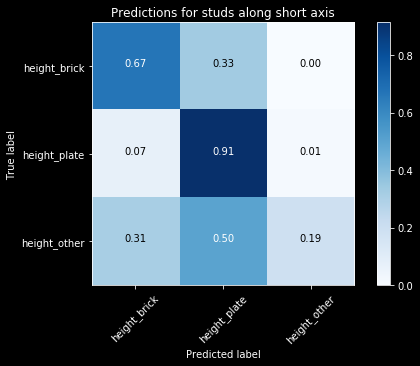

In [46]:
colorz = ['r','g','b']

title  = 'Height Classification'
height_list = [ col for col in full_df.columns.values if ('height_' in col) ]


true_list = []
pred_list = []

for i in range( 0, 3 ):

    class_str = height_list[i]
    y_true = full_df[class_str].values

    
    preds = height_clf_dict[class_str].predict(x_vals)

    pred_list.append( preds )
    true_list.append( y_true )

pred_arr = np.swapaxes( np.array(pred_list), 0, 1 )
true_arr = np.swapaxes( np.array(true_list), 0, 1 )

cnf_matrix = confusionMatrix( true_arr, pred_arr )
np.set_printoptions(precision=2)

## Plot non-normalized confusion matrix
fig, ax = plt.subplots()
plot_confusion_matrix(cnf_matrix, classes=height_list, normalize=True,
                      title=tit)
plt.show()
